In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
import numpy as np
from scipy import stats
import pylab as plt
import torch
import swyft
from torch import nn
from simulators import SimulatorBlob, SimulatorLinePattern, SimulatorLetter, SimulatorSnake, SimulatorUnraveling, HistoryDict

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.87it/s]


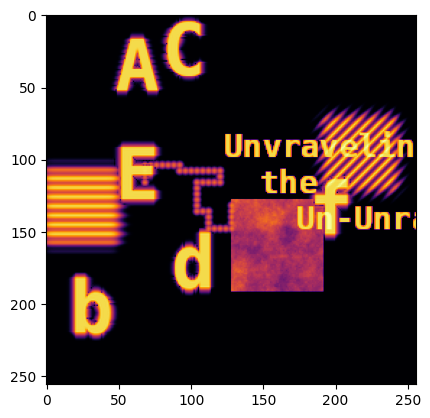

In [80]:
class SimCom(swyft.Simulator):
    def __init__(self, bounds = HistoryDict()):
        super().__init__()
        self.sim1 = SimulatorLinePattern(bounds = bounds['line/'])
        self.sim2 = SimulatorBlob(bounds = bounds['blob/'])
        self.sim3 = SimulatorLetter(bounds = bounds['letter/'])
        self.sim4 = SimulatorSnake(bounds = bounds['snake/'])
        self.sim5 = SimulatorUnraveling()
        
    def embed(self, mu_in):
        mu = np.zeros((256, 256))
        i, j = 128, 128
        mu[i:i+64, j:j+64] += mu_in.numpy()*0.1
        return mu
        
    def build(self, graph):
        with graph.prefix("line/"):
            self.sim1.build(graph)
        with graph.prefix("blob/"):
            self.sim2.build(graph)
        with graph.prefix("letters/"):
            self.sim3.build(graph)
        with graph.prefix("snake/"):
            self.sim4.build(graph)
        with graph.prefix("unraveling/"):
            self.sim5.build(graph)
        mu1 = graph['line/mu']
        mu2_original = graph['blob/mu']
        mu3 = graph['letters/mu']
        mu4 = graph['snake/mu']
        mu5 = graph['unraveling/mu']
        mu2 = graph.node("blob/mu_embedded", self.embed, mu2_original)
        mu = graph.node("mu", lambda *args: sum([*args])+np.random.randn(256, 256)*0, mu1, mu2, mu3, mu4, mu5)

        
sim = SimCom()
mu = sim.sample(1)[0]['mu']
plt.imshow(np.log10(np.abs(mu)+1e-3), cmap = 'inferno')

In [76]:
samples = sim.sample(100)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 42.55it/s]


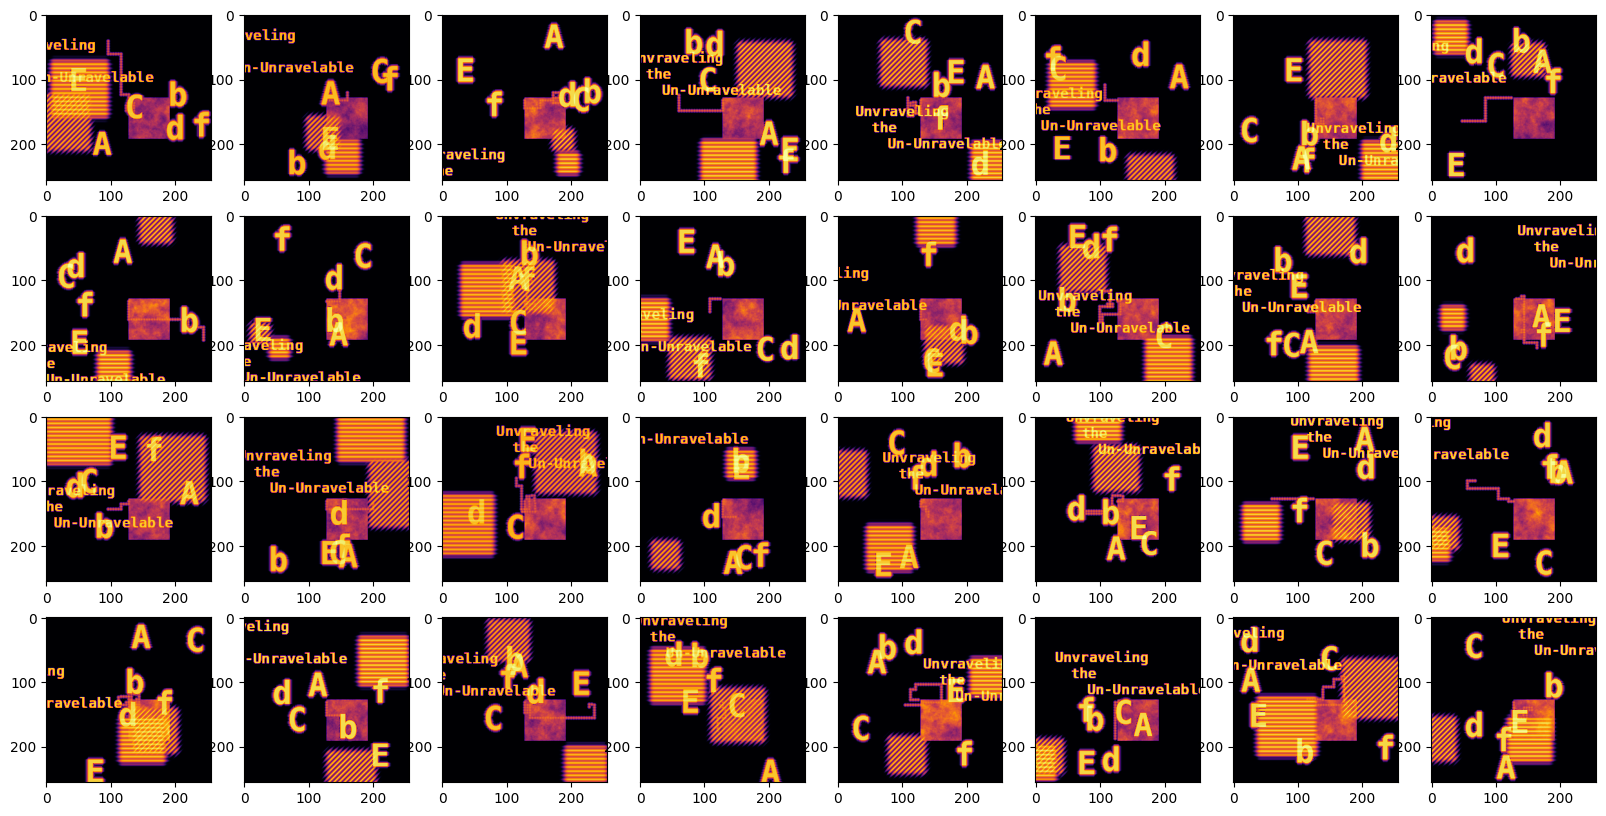

In [78]:
plt.figure(figsize = (20, 10))
for i in range(32):
    plt.subplot(4, 8, i+1)
    mu = samples[i]['mu']
    plt.imshow(np.log10(np.abs(mu)+1e-3), cmap = 'inferno')